# Cramer-Rao Lower Bounds

In [68]:
from math import *
import bokeh
import numpy as np
import sympy as sp
from sympy.physics.quantum.dagger import Dagger
sp.init_printing()

In [69]:
F, W, phi, psi, t1, t2, omega, w1, w2 = sp.symbols('F W phi psi t1 t2 omega w1 w2', real=True)
Lambda = sp.diag(w1,w1,w2,w2)
A = sp.ImmutableMatrix(
    [
     [sp.cos(phi + psi*t1), sp.cos(phi + (psi + omega)*t1)],
     [sp.sin(phi + psi*t1), sp.sin(phi + (psi + omega)*t1)],
     [sp.cos(phi + psi*t2), sp.cos(phi + (psi + omega)*t2)],
     [sp.sin(phi + psi*t2), sp.sin(phi + (psi + omega)*t2)]
    ])
X = sp.ImmutableMatrix([F,W])

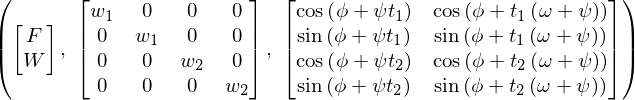

In [70]:
X, Lambda, A

Calculate Fisher Information Matrix from blocks:
$$ F = \left[
    \begin{matrix}
    F_1   & F_2 \\
    F_2^T & F_3 \\
    \end{matrix}
    \right] \in \mathbb{R}^{4x4}
    $$
where 
$$ F_1 = A^T \Lambda A $$
$$ F_2 = \left[ \begin{matrix}
    A^T \Lambda^2 \frac{\partial A}{\partial \phi} X &
    A^T \Lambda^2 \frac{\partial A}{\partial \psi} X 
    \end{matrix} \right] $$
$$ F_3 = \left[ \begin{matrix}
    X^T \frac{\partial A}{\partial \phi} \Lambda^2 \frac{\partial A}{\partial \phi} X &
    X^T \frac{\partial A}{\partial \phi} \Lambda^2 \frac{\partial A}{\partial \psi} X \\
    X^T \frac{\partial A}{\partial \psi} \Lambda^2 \frac{\partial A}{\partial \phi} X &
    X^T \frac{\partial A}{\partial \psi} \Lambda^2 \frac{\partial A}{\partial \psi} X 
    \end{matrix} \right] $$

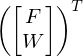

In [58]:
Ah = Dagger(A)
Xt = sp.Transpose(X)
F1 = Ah * Lambda * A
F2_l3 = Ah * Lambda * Lambda * sp.diff(A,phi) * X
F2_l4 = Ah * Lambda * Lambda * sp.diff(A,psi) * X

F2 = sp.BlockMatrix([[F2_l3, F2_l4]]).as_explicit()
F2t = sp.ImmutableMatrix([[F2[0,0], F2[1,0]],[F2[0,1], F2[1,1]]])
F_k3l3 = Xt * sp.diff(Ah,phi) * Lambda * Lambda * sp.diff(A,phi) * X;
F_k3l4 = Xt * sp.diff(Ah,phi) * Lambda * Lambda * sp.diff(A,psi) * X;
F_k4l3 = Xt * sp.diff(Ah,phi) * Lambda * Lambda * sp.diff(A,phi) * X;
F_k4l4 = Xt * sp.diff(Ah,psi) * Lambda * Lambda * sp.diff(A,psi) * X;
F3 = sp.BlockMatrix([[F_k3l3, F_k3l4], [F_k4l3, F_k4l4]]).as_explicit()
F = sp.BlockMatrix([[F1, F2], [F2t, F3]]).as_explicit()
Xt

In [66]:
FIM = sp.simplify(F)

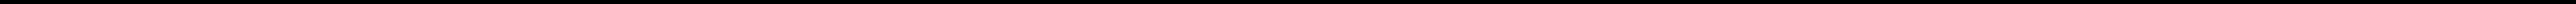

In [67]:
invFim = FIM.inv()
invFim

In [72]:
sp.simplify(invFim[1,1])

MemoryError: 